In [73]:
import matplotlib.pyplot as plt
import numpy as np 

In [84]:
def generate_kmers_replacing_N(s):
    if 'N' not in s:
        return [s]
    else:
        i = s.index('N')
        rest_strings = generate_kmers_replacing_N(s[i+1:])
        return [s[:i] + base + rest for base in 'ATCG' for rest in rest_strings]

In [63]:
def generate_kmers(sequence, k=3, exclude_N=False):
    kmers = list()
    n = len(sequence)
    for i in range(n - k + 1):
        kmer = sequence[i:i + k]
        if 'N' in kmer:
            if exclude_N:
                continue
            else:
                kmers.extend(generate_kmers_replacing_N(kmer))
        else:
            kmers.append(kmer)
    return kmers

In [86]:
def process_seq (seq_path, name):
    sequences = [] 
    with open(seq_path, "r") as f:
        seq = ""
        for line in f:
            if line.startswith(">"):  # skip header lines
                if seq != "":  # if we have collected a DNA sequence, add it to the list
                    sequences.append(seq)
                    seq = ""  # reset the sequence string
            else:
                seq += line.strip()  # add the current line to the sequence string
        # add the last sequence to the list (since there's no new header line after the last sequence)
        if seq != "":
            sequences.append(seq) 
    l = sum([len(seq) for seq in sequences]) 
    print(f"Length of the Sequence = {l}") 

    genome_dict = {} 
    for seq in sequences:
        kmers = generate_kmers(seq, k=3, exclude_N=True) 
        for kmer in kmers:
            if kmer in genome_dict:
                genome_dict[kmer] += 1
            else:
                genome_dict[kmer] = 1
    genome_dict = dict(sorted(genome_dict.items()))
    kmers = list(genome_dict.keys())
    counts = list(genome_dict.values())

    plt.figure(figsize=(20,5))
    plt.bar(kmers, counts)
    plt.xlabel("3-mers")
    plt.ylabel("Counts")
    plt.xticks(rotation=90)
    plt.title(f"3-mer histogram of {name}", fontsize=16)
    plt.show()
    
    return genome_dict


Length of the Sequence = 8399699


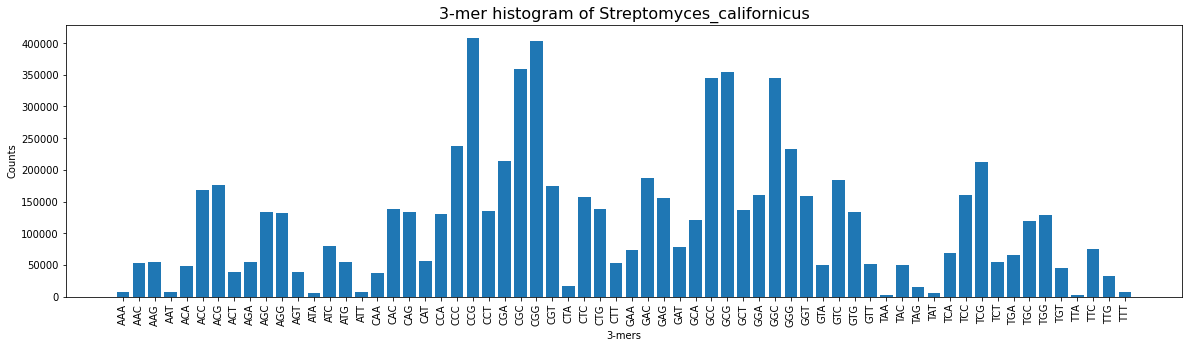

In [87]:
# Bacteria: Streptomyces_californicus 
bacteria_dna = "GCA_000715715.1_ASM71571v1_genomic.fna" 
kmer_counts = process_seq(bacteria_dna, "Streptomyces_californicus") 

Length of the Sequence = 8998498


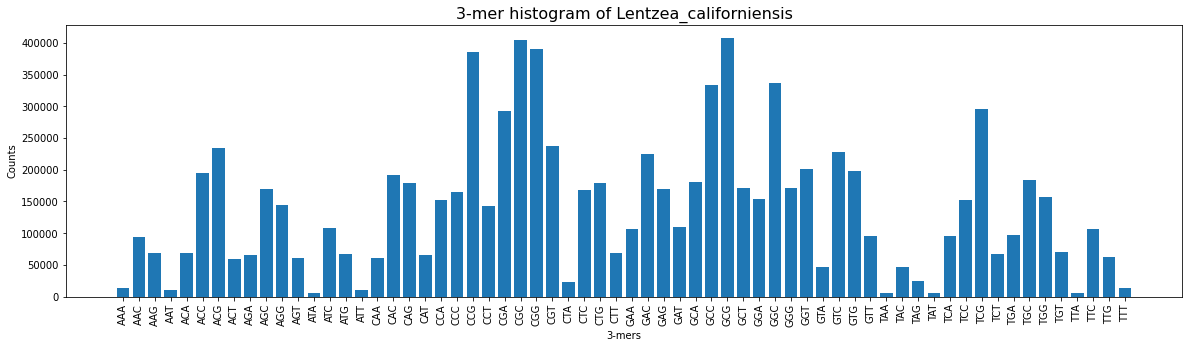

In [99]:
# Bacteria: Lentzea_californiensis 
random_genome = "GCA_024648825.1_ASM2464882v1_genomic.fna"
kmer_counts2 = process_seq(random_genome, "Lentzea_californiensis")

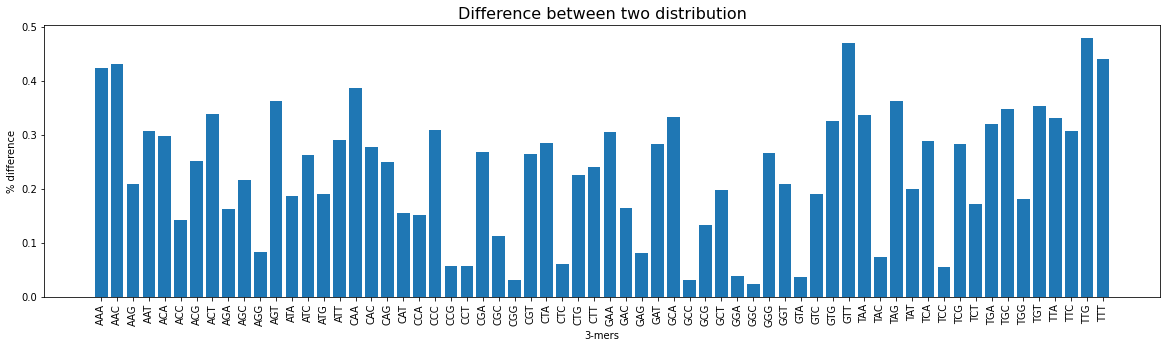

In [104]:
# calculate the absolute differences between the distributions

diff_dict = {}
for key in kmer_counts:
    diff_dict[key] = abs(kmer_counts[key] - kmer_counts2[key])/max(kmer_counts[key], kmer_counts2[key])

plt.figure(figsize=(20,5))
plt.bar(list(diff_dict.keys()), list(diff_dict.values()))
plt.xlabel("3-mers")
plt.ylabel("% difference")
plt.xticks(rotation=90)
plt.title(f"Difference between two distribution", fontsize=16)
plt.show()

In [101]:
min_dict = {}
for key in kmer_counts:
    min_dict[key] = min(kmer_counts[key], kmer_counts2[key])
most_common_kmers = dict(sorted(min_dict.items(), key=lambda x: x[1], reverse=True))

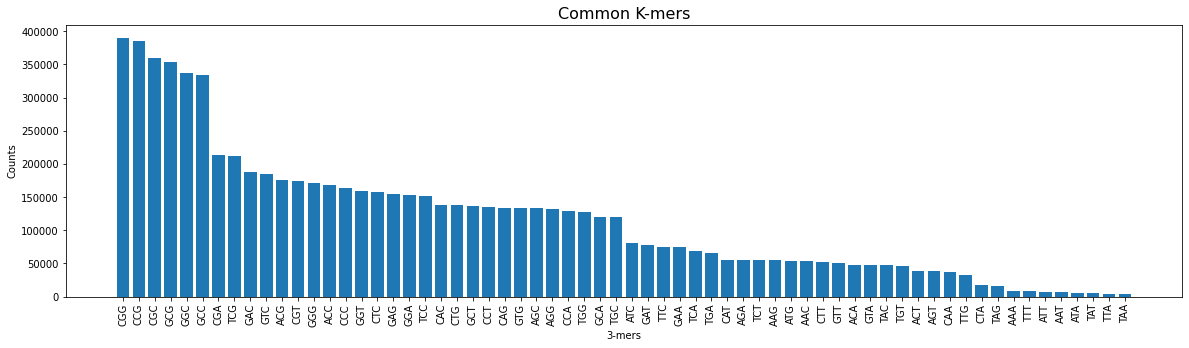

In [102]:
plt.figure(figsize=(20,5))
plt.bar(list(most_common_kmers.keys()), list(most_common_kmers.values()))
plt.xlabel("3-mers")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.title(f"Common K-mers", fontsize=16)
plt.show()